<a href="https://colab.research.google.com/github/arun-arunisto/Tensorflow_Tutorial/blob/todo/Keras_for_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Using Keras for Machine Linear Regression
Regression is a form of supervised learning which aims to model the relationship between one or more input variables (features) and a continuous (target) variable. We assume that the relationship between the input variables x and the target variable y can be expressed as a weighted sum of the inputs (i.e, the model is linear in the parameters). In short linear regression aims to learn a function that maps one or more input features to a single numerical target value.
<img src="https://learnopencv.com/wp-content/uploads/2023/01/keras-linear-regression-model-plot.png">

In [1]:
#importing packages
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Activation
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras import layers

import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
SEED_VALUE = 42

#fix seed to make training deterministic
np.random.seed(SEED_VALUE)
tf.random.set_seed(SEED_VALUE)

In [3]:
#Data Exploration loading the housing dataset
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()
X_train.shape

57026/57026 [==============================] - 0s 0us/step


(404, 13)

In [4]:
print("Input features: ",X_train[0])
print("Output target: ",y_train[0])

Input features:  [  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]
Output target:  15.2


###Extract features from the dataset
we are only going to use a single feature from the dataset, so to keep things simple, we will store the feature data in a new variable

In [6]:
boston_features = {
    "Average Number of Rooms":5,
}

X_train_1d = X_train[:, boston_features["Average Number of Rooms"]]
X_test_1d = X_test[:, boston_features["Average Number of Rooms"]]
print("X_train_1d shape: ",X_train_1d.shape)
print("X_test_1d shape: ",X_test_1d.shape)

X_train_1d shape:  (404,)
X_test_1d shape:  (102,)


###Plot the features
Here we plot the median price of a home vs. the single feature ('Average Number of Rooms')

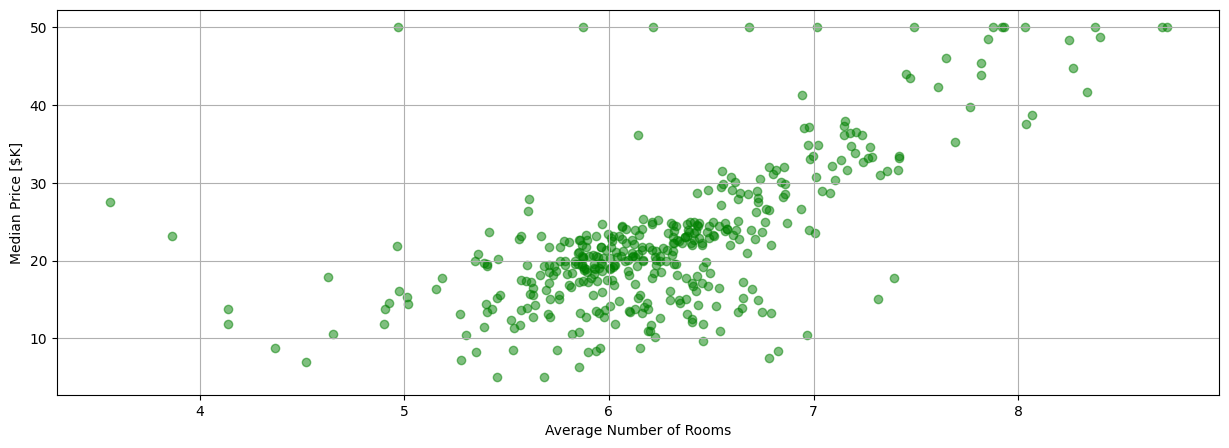

In [7]:
plt.figure(figsize=(15, 5))

plt.xlabel("Average Number of Rooms")
plt.ylabel("Median Price [$K]")
plt.grid("on")
plt.scatter(X_train_1d[:], y_train, color="green", alpha=0.5)

###Linear Regression Model
<img src="https://learnopencv.com/wp-content/uploads/2023/01/keras-linear-regression-model-plot.png">
The plot above shows the training data for the single independent variable (number of rooms) and the dependent variable (the median price of a house), we are going to use linear regression to develop a reliable model for this data. In the above image the model is simply a straight line defined by its slope(m) and y-intercept(b)

###Neural Network Perspective and Terminology
<img src="https://learnopencv.com/wp-content/uploads/2023/01/keras-linear-regression-forward-pass-block-diagram.png">
The figure shows how this model can be represented as single neuron network, we are going to use this example to introduce neural network components and terminology,
the <b>Input</b> data consists of a single feature (avearge number of rooms), and the <b>Predicted output</b> is a scalar (predicted median price of a home). Note that each data sample in the dataset represents the statistics for a Boston suburb. The <b>m</b> and <b>b</b> are model parameters are learned iteratively during the training process. The Model parameters can be computed by the method of Ordinary Least Squares(OSL) in the closed form.
We can also solve this problem iteratively using numerical technique
called <b>Gradient Descent</b>. which is the basis of how neural networks trained.

The above network that takes a single input and produces a single output which is the predicted (average) price of home. and the single neuron has two trainable parameters, which are slope(m), and y-intercept(b) of the linear model, these parameters are more generally known as the weight and bias, respectively.
<img src="https://learnopencv.com/wp-content/uploads/2023/01/keras-linear-regression-weight-update-block-diagram.png">
The sightly more formal diagram shown in above for the same model. The difference is used as the basis to compute a loss which is then used as feedback in the network to adjust the model as the basis to compute a loss which is then used as feedback in the network to adjust the model parameters in a way that improves the prediction. this process involves two steps called "Gradient Descent" and "Backpropagation".It's not the important at this stage to understand the mathematical details of how this works, but it's important to understand that there is an iterative process to training the model.
The Loss function we use can take many forms. for this we will use MSE Mean Square Error, which is a very common loss function used in regression problems


###Modeling a Neural Network in Keras
The network diagram in the previous section represents the simplest possible neural network. The network has a single layer consisting of a single neuron that outputs wx + b. for every training sample the predicted output is compared to the actual value from the training data, and the loss is computed. The loss can then be used fine-tune (update) the model parameters.
All of the details associated with training a neural network are taken care of by Keras as summarized in the following workflow.
1. Building or define a network model predefined layers in Keras
2. Compile the model with model.compile()
3. Train the model with model.fit()
4. Predict the output model.predict()

In [8]:
#1. Define the Keras Model
model = Sequential()

#Define the model consisting of a single neuron
model.add(Dense(units=1, input_shape=(1,)))

#display a summary of the model architecture
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [9]:
#Compile the model
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.005), loss="mse")

In [10]:
#Train the model
history = model.fit(
    X_train_1d,
    y_train, batch_size=16,
    epochs=101,
    validation_split=0.3,
)

Epoch 1/101
18/18 [==============================] - 1s 10ms/step - loss: 970.1560 - val_loss: 1061.8621
Epoch 2/101
18/18 [==============================] - 0s 2ms/step - loss: 925.7628 - val_loss: 1020.1092
Epoch 3/101
18/18 [==============================] - 0s 3ms/step - loss: 887.5730 - val_loss: 980.9541
Epoch 4/101
18/18 [==============================] - 0s 2ms/step - loss: 850.9833 - val_loss: 942.5758
Epoch 5/101
18/18 [==============================] - 0s 3ms/step - loss: 814.8679 - val_loss: 904.5881
Epoch 6/101
18/18 [==============================] - 0s 3ms/step - loss: 779.6299 - val_loss: 867.8489
Epoch 7/101
18/18 [==============================] - 0s 3ms/step - loss: 745.3942 - val_loss: 831.6042
Epoch 8/101
18/18 [==============================] - 0s 3ms/step - loss: 712.1296 - val_loss: 796.9911
Epoch 9/101
18/18 [==============================] - 0s 3ms/step - loss: 679.6613 - val_loss: 762.5912
Epoch 10/101
18/18 [==============================] - 0s 3ms/step - lo

In [13]:
#plot the training results
def plot_loss(history):
  plt.figure(figsize=(20, 5))
  plt.plot(history.history['loss'], 'g', label='Training Loss')
  plt.plot(history.history['val_loss'], 'b', label='Validation Loss')
  plt.xlim([0, 100])
  plt.ylim([0, 300])
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
  plt.grid(True)

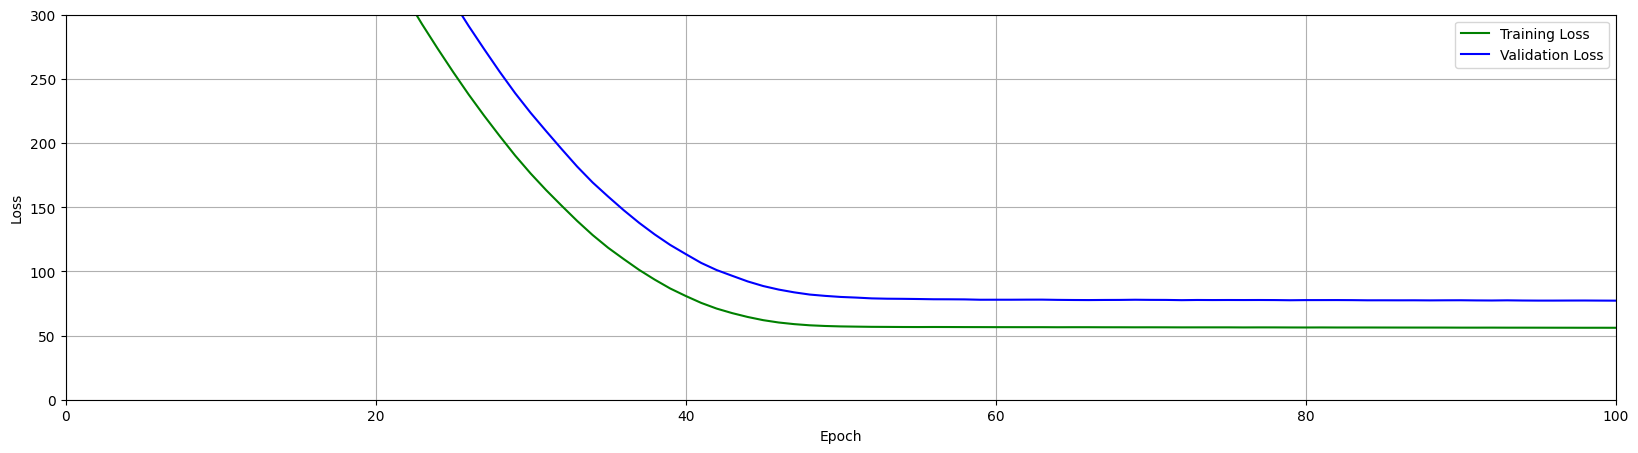

In [14]:
plot_loss(history)

There are two curves one for the training loss and one for the validation loss. both are large initially and then steadily decrese and eventually level off with no further improvment. Since the model is only trained on the training data, it is also fairly typical that the training loss is lower than the validation loss.

In [16]:
#predictions using the model
#going to predict the median price of a home with [3, 4, 5, 6, 7] rooms.
x = [3, 4, 5, 6, 7]
y_pred = model.predict(x)
for idx in range(len(x)):
  print(f"Predicted price of a home with {x[idx]} rooms: ${int(y_pred[idx]*10)/10}K")

1/1 [==============================] - 0s 40ms/step
Predicted price of a home with 3 rooms: $12.4K
Predicted price of a home with 4 rooms: $15.4K
Predicted price of a home with 5 rooms: $18.4K
Predicted price of a home with 6 rooms: $21.5K
Predicted price of a home with 7 rooms: $24.5K


In [17]:
#plot the model and the data
#generate feature data that spans the range of interest for the independent variable
x = np.linspace(3, 9, 10)

#use the model to predict the dependent variable.
y = model.predict(x)

1/1 [==============================] - 0s 36ms/step


In [19]:
def plot_data(x_data, y_data, x, y, title=None):

    plt.figure(figsize=(15,5))
    plt.scatter(x_data, y_data, label='Ground Truth', color='green', alpha=0.5)
    plt.plot(x, y, color='k', label='Model Predictions')
    plt.xlim([3,9])
    plt.ylim([0,60])
    plt.xlabel('Average Number of Rooms')
    plt.ylabel('Price [$K]')
    plt.title(title)
    plt.grid(True)
    plt.legend()

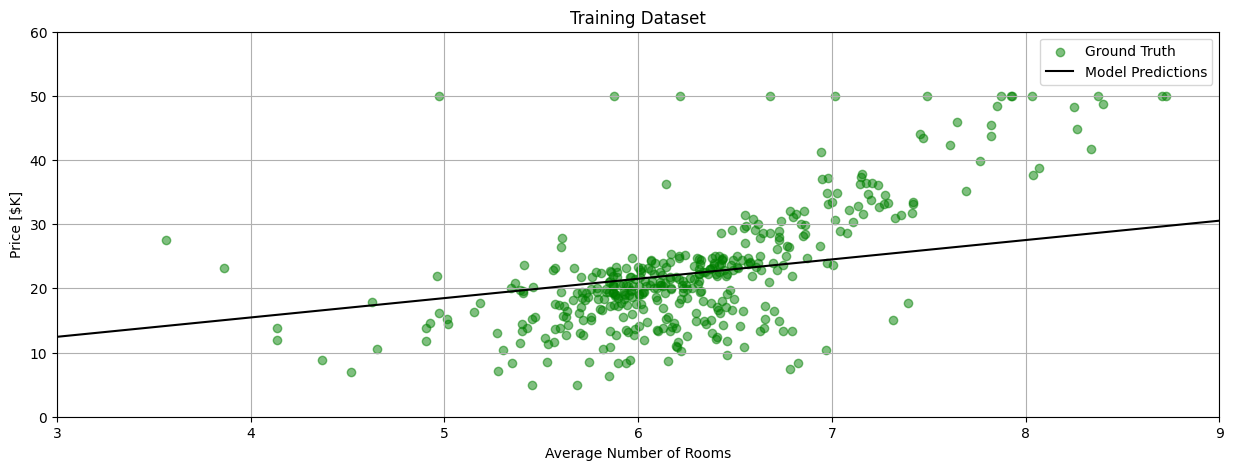

In [21]:
plot_data(X_train_1d, y_train, x, y, title='Training Dataset')

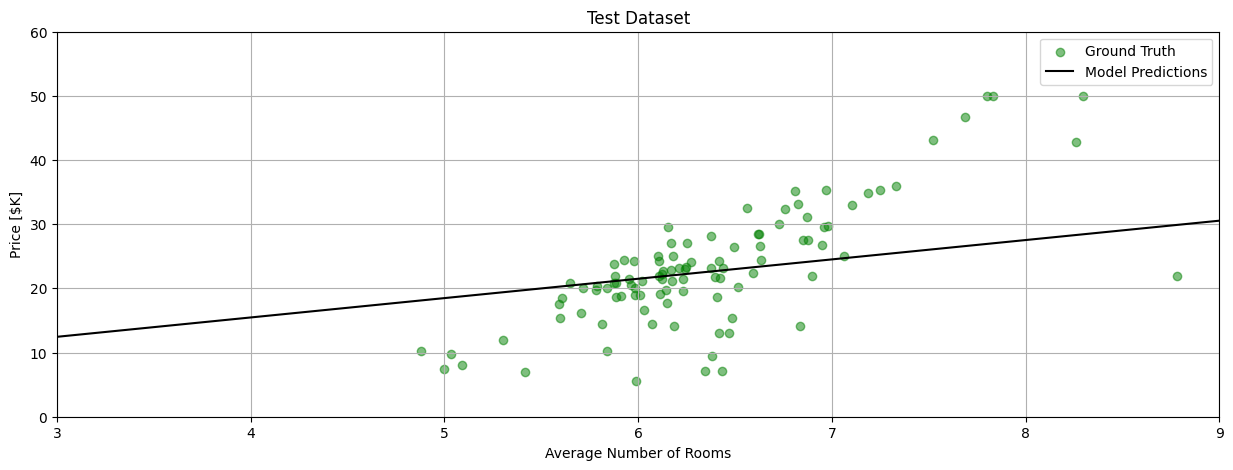

In [22]:
plot_data(X_test_1d, y_test, x, y, title='Test Dataset')